In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


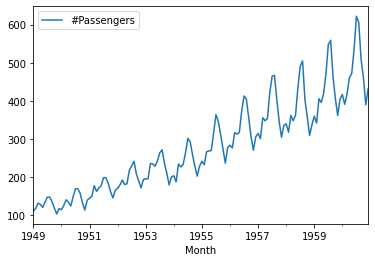

In [384]:
data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
data.plot()
data

In [385]:
data2 = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
train_data = data2.iloc[:-14]
test_data = data2.iloc[-14:]
print(train_data.shape), print(test_data.shape)

(130, 1)
(14, 1)


(None, None)

In [386]:
#lets do adfuller test
result = adfuller(data)
print("The value of P: ", result[1])
if result[1]>0.05:
    print("Unstationary")
    
else:
    print("Stationary")

The value of P:  0.9918802434376409
Unstationary


In [387]:
#converting it into stationary
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [388]:
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [389]:
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-04-01,-25.0
1949-05-01,12.0
1949-06-01,27.0
1949-07-01,-23.0
1949-08-01,-12.0
...,...
1960-08-01,-127.0
1960-09-01,21.0
1960-10-01,133.0


In [390]:
#checking adfuller again
result = adfuller(data)
print("The value of P: ", result[1])
if result[1]>0.05:
    print("Unstationary")
    
else:
    print("Stationary")

The value of P:  5.079966883921446e-16
Stationary


In [391]:
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-05-01,37.0
1949-06-01,15.0
1949-07-01,-50.0
1949-08-01,11.0
1949-09-01,13.0
...,...
1960-08-01,-99.0
1960-09-01,148.0
1960-10-01,112.0


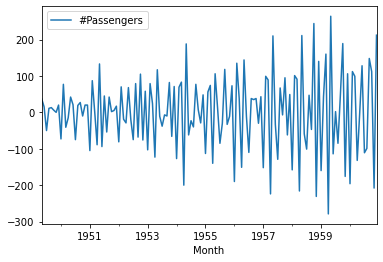

In [392]:
data.plot()

In [393]:
best_model = auto_arima(data,start_p = 0, max_p = 6, start_q=0, max_q = 5, start_d = 0, max_d = 5,trace = True, supress_warnings = True)
best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1702.439, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1633.417, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1700.456, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1576.466, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1566.495, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1543.972, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1537.627, Time=0.14 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=1492.110, Time=0.19 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=1490.170, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1535.678, Time=0.06 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(6, 0, 0)   Log Likelihood                -738.085
Date:                Tue, 21 Dec 2021   AIC                           1490.170
Time:                        11:57:37   BIC                           1510.762
Sample:                             0   HQIC                          1498.538
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5409      0.075    -20.525      0.000      -1.688      -1.394
ar.L2         -1.8570      0.120    -15.482      0.000      -2.092      -1.622
ar.L3         -1.7125      0.152    -11.304      0.000      -2.009      -1.416
ar.L4         -1.5710      0.167     -9.431      0.000      -1.898      -1.245
ar.L5         -1.0550      0.126     -8.351      0.000      -1.303      -0.807
ar.L6         -0.5626      0.067     -8.446      0.000      -0.693      -0.432
sigma2      2143.8821    260.397      8.233      0.000    1633.513    2654.252
===================================================================================
Ljung-Box (Q):                      303.75   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.00   Prob(JB):                         0.42
Heteroskedasticity (H):               6.10   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [394]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data, order=(6,0,0), seasonal_order = (6,0,0,12))
import warnings
warnings.filterwarnings("ignore")

In [395]:
model = model.fit()

In [396]:
predictions = model.predict(start= len(train_data), end = len(train_data)+len(test_data)+12, dynamic = True)
predictions

1959-11-01    355.189617
1959-12-01    382.584332
1960-01-01    401.094981
1960-02-01    382.982613
1960-03-01    441.421946
1960-04-01    428.847060
1960-05-01    451.076012
1960-06-01    506.678976
1960-07-01    576.832145
1960-08-01    590.306686
1960-09-01    488.495730
1960-10-01    433.298191
1960-11-01    381.475182
1960-12-01    405.852586
1961-01-01    425.222322
1961-02-01    405.677196
1961-03-01    466.361359
1961-04-01    452.661002
1961-05-01    475.779527
1961-06-01    528.929131
1961-07-01    599.559860
1961-08-01    614.735462
1961-09-01    511.198877
1961-10-01    454.964134
1961-11-01    402.573648
1961-12-01    424.165904
1962-01-01    442.212203
Freq: MS, dtype: float64

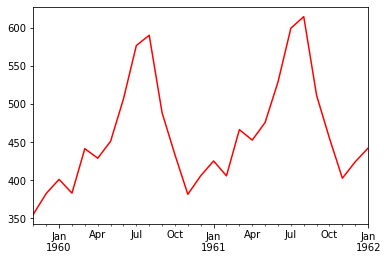

In [397]:
predictions.plot(color = 'red')

In [402]:
data2['predictions'] = predictions

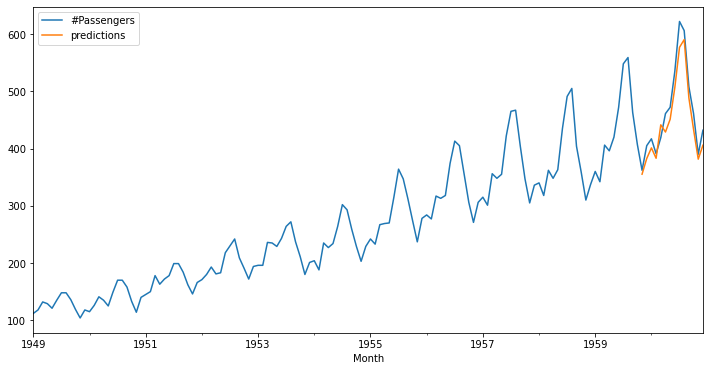

In [403]:
data2.plot(figsize = (12,6))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months = x)for x in range(0,24)]
futures_predictions = 

In [400]:
'''from sklearn.metrics import mean_squared_error as MSE
error = MSE(test_data, predictions[0:14])
print(error)'''

'from sklearn.metrics import mean_squared_error as MSE\nerror = MSE(test_data, predictions[0:14])\nprint(error)'